In [3]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import scprep

In [5]:
data_name = 'adata_emt'
# adata = sc.read_h5ad(f'../../../data/{data_name}_meld.h5ad')

X_phate = np.load('../../data_main/X_phate.npy')
X_phate_vis = np.load('../../data_main/X_phate_vis.npy')

savepath = f'../../results/{data_name}/'
adata = sc.read_h5ad(f"../../data/{data_name}_meld.h5ad")

In [6]:
adata.obs['meld_likelihood']

index
80694    0.976835
68936    0.919776
72480    0.680832
33311    0.854242
48598    0.401753
           ...   
40329    0.543927
220      0.431367
38388    0.735682
72235    0.247291
31188    0.074341
Name: meld_likelihood, Length: 19400, dtype: float64

In [7]:
adata.obs['dpt_bin'] = pd.cut(adata.obs['meld_likelihood'], bins=10, labels=False)

dpt_bin
0    5944
9    3627
4    1603
8    1518
3    1385
5    1324
7    1214
6    1193
1     937
2     655
Name: count, dtype: int64


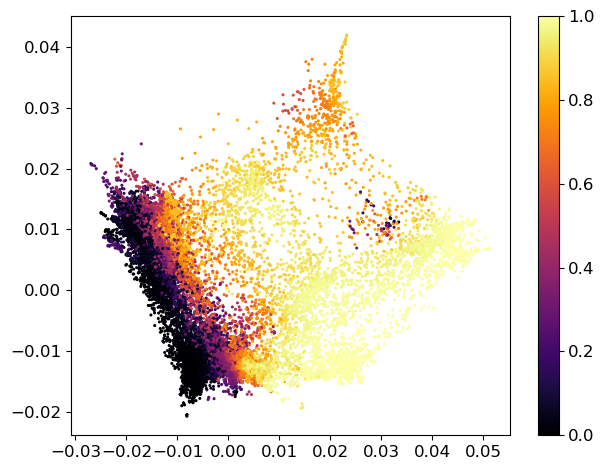

In [8]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['meld_likelihood'])
print(adata.obs['dpt_bin'].value_counts())

In [9]:
mioflow_df = pd.DataFrame(X_phate, columns=[f'd{i}' for i in range(1, X_phate.shape[1]+1)])
mioflow_df['samples'] = adata.obs['dpt_bin'].values
mioflow_df.to_csv(f'{savepath}/mioflow_data_10d.csv', index=False)

In [10]:
adata.write(f"../../data/{data_name}_meld.h5ad")

In [11]:
adata

AnnData object with n_obs × n_vars = 19400 × 60
    obs: 'time_label', 'cell_class', 'cell_cycle_label', 'meld_likelihood', 'dpt_bin'
    uns: 'pca'
    obsm: 'X_pca', 'X_phate'
    varm: 'PCs'